In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 
from pathlib import Path 
import seaborn as sns 
import matplotlib.pyplot as plt

In [57]:

root_path = Path(r'C:\Users\gopeami\OneDrive - Vesuvius\Desktop\PhD13- 2025-2026\ML Practice\Kaggle\Brain Tumour/Training')

IMAGE_EXTS = {'.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'}

rows = []

for label_dir in sorted(p for p in root_path.iterdir() if p.is_dir()):
    label = label_dir.name
    for img_path in sorted(label_dir.rglob('*')):
        if img_path.is_file() and img_path.suffix.lower() in IMAGE_EXTS:
            rows.append({'image_path': str(img_path), 'label': label})

In [58]:
df = pd.DataFrame(rows, columns=['image_path', 'label'])

if df.empty:
    raise ValueError(f'No images found under: {root_path}')
print(f'Found {len(df)} images across {df["label"].nunique()} labels.')
print(df['label'].value_counts())

Found 2870 images across 4 labels.
label
pituitary_tumor     827
glioma_tumor        826
meningioma_tumor    822
no_tumor            395
Name: count, dtype: int64


In [59]:
df

,image_path,label
0,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,glioma_tumor
1,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,glioma_tumor
2,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,glioma_tumor
3,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,glioma_tumor
4,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,glioma_tumor
...,...,...
2865,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,pituitary_tumor
2866,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,pituitary_tumor
2867,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,pituitary_tumor
2868,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,pituitary_tumor


In [60]:
df.shape

(2870, 2)

In [61]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [62]:
df.duplicated().sum()

np.int64(0)

In [63]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  2870 non-null   object
 1   label       2870 non-null   object
dtypes: object(2)
memory usage: 45.0+ KB


<Axes: xlabel='label'>

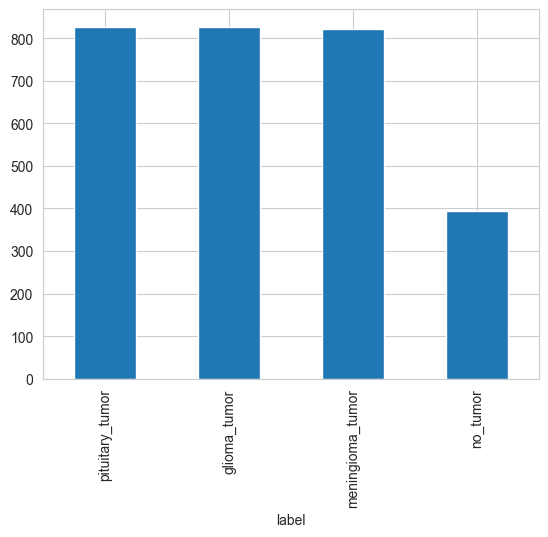

In [65]:
df['label'].value_counts().plot(kind='bar')

In [66]:
df['label'].unique()

array(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
      dtype=object)

Text(0, 0.5, 'Count')

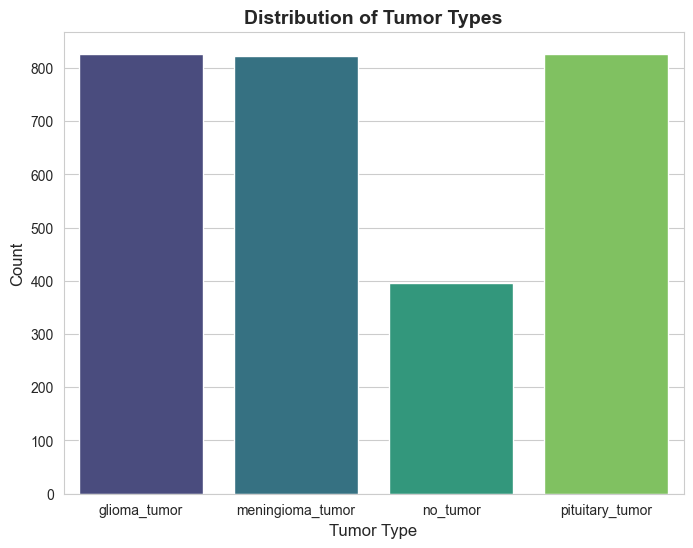

In [67]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis", ax=ax)

ax.set_title("Distribution of Tumor Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

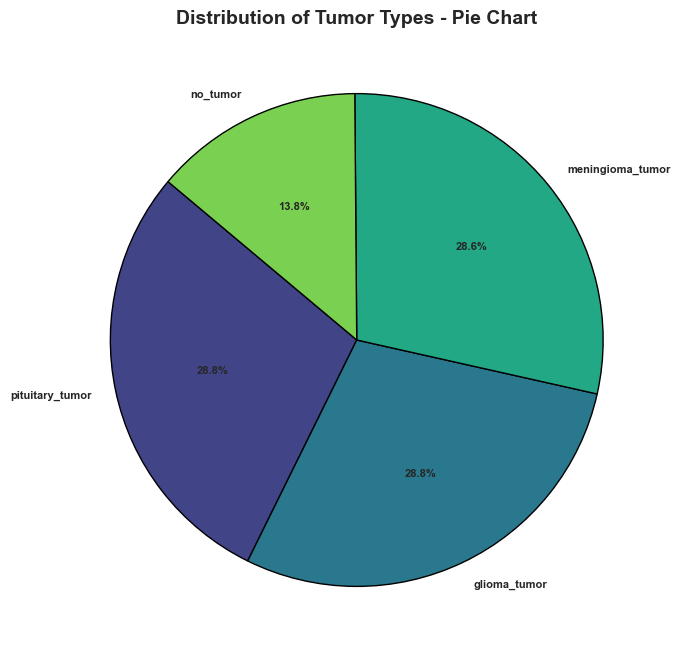

In [68]:
for p in ax.patches:
 ax.annotate(f'{int(p.get_height())}', 
 (p.get_x() + p.get_width() / 2., p.get_height()), 
 ha='center', va='bottom', fontsize=11, color='black', 
 xytext=(0, 5), textcoords='offset points')
plt.show()
label_counts = df["label"].value_counts()
fig, ax = plt.subplots(figsize=(10, 8))
colors = sns.color_palette("viridis", len(label_counts))
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', 
 startangle=140, colors=colors, textprops={'fontsize': 8, 'weight': 
'bold'},
 wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax.set_title("Distribution of Tumor Types - Pie Chart", fontsize=14, 
fontweight='bold')
plt.show()

In [69]:
from PIL import Image
num_images = 5
unique_labels = df['label'].unique()
plt.figure(figsize=(15, len(unique_labels) * 3))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

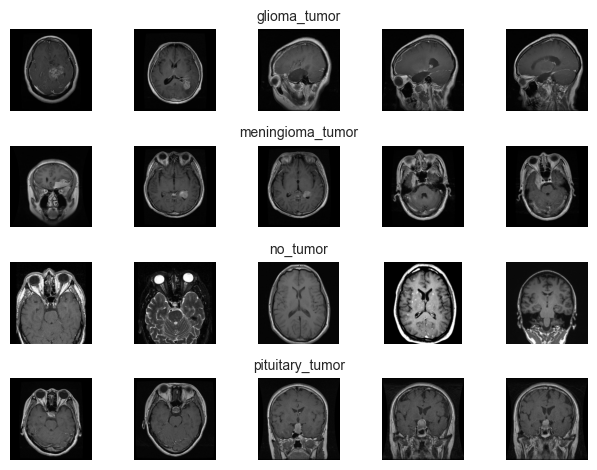

In [70]:
for row_idx, label in enumerate(unique_labels):
    label_images = df[df['label'] == label].head(num_images)['image_path'].tolist()
    for col_idx, img_path in enumerate(label_images):
        plt_idx = row_idx * num_images + col_idx + 1
        plt.subplot(len(unique_labels), num_images, plt_idx)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')
        if col_idx == 2: 
            plt.title(label, fontsize=10)
plt.tight_layout()
plt.show()

In [71]:
import warnings
warnings.filterwarnings('ignore')

max_samples = df['label'].value_counts().max()
balanced_df = df.groupby('label', group_keys=False).apply(
 lambda x: x.sample(n=max_samples, replace=True, random_state=42)
).reset_index(drop=True)


balanced_df = balanced_df[['image_path', 'label']]

df = balanced_df

In [72]:
df

,image_path,label
0,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,glioma_tumor
1,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,glioma_tumor
2,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,glioma_tumor
3,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,glioma_tumor
4,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,glioma_tumor
...,...,...
3303,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,pituitary_tumor
3304,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,pituitary_tumor
3305,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,pituitary_tumor
3306,C:\Users\gopeami\OneDrive - Vesuvius\Desktop\P...,pituitary_tumor


In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [74]:
class ArConv(nn.Module):
    def __init__(self, channels, kernel_size=3, stride=1, padding=1):
        super(ArConv, self).__init__()
        self.dw_conv = nn.Conv2d(channels, channels, kernel_size=(1, 
kernel_size), stride=(1, stride), padding=(0, padding), groups=channels, 
bias=False)


In [75]:
def forward(self, x):
     y = self.dw_conv(x)
     y = y.permute(0, 1, 3, 2)
     y = self.dw_conv(y)
     y = y.permute(0, 1, 3, 2)
     return y

In [76]:
class ArConv(nn.Module):
    def __init__(self, in_channels, out_channels, expansion, stride=1):
        super(ArConvblock, self).__init__()
        exp_channels = in_channels * expansion
        self.expand_conv = nn.Conv2d(in_channels, exp_channels, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(exp_channels)
        if stride == 2:
            self.dw = nn.Conv2d(exp_channels, exp_channels, kernel_size=3, stride=2, padding=1, groups=exp_channels, bias=False)
        else:
            self.dw = ArConv(exp_channels, kernel_size=3, stride=stride, padding=1)
        self.bn2 = nn.BatchNorm2d(exp_channels)
        self.project = nn.Conv2d(exp_channels, out_channels, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels)
        self.stride = stride
        self.equal_dim = (in_channels == out_channels and stride == 1)

    def forward(self, x):
        identity = x
        out = self.expand(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dw(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.project_conv(out)
        out = self.bn3(out)
        if self.equal_dim:
            out = out + identity
            return out

In [77]:
class ArConvNet(nn.Module):
     def __init__(self, num_classes=4):
      super(ArConvNet, self).__init__()
      self.initial = nn.Conv2d(3, 24, kernel_size=4, stride=4, padding=0)
      self.blocks = nn.Sequential(
         ArConvBlock(24, 24, 4, 1),
         ArConvBlock(24, 24, 4, 1),
         ArConvBlock(24, 24, 4, 1),
         ArConvBlock(24, 32, 8, 2),
         ArConvBlock(32, 32, 8, 1),
         ArConvBlock(32, 32, 8, 1),
         ArConvBlock(32, 48, 12, 2),
         ArConvBlock(48, 48, 12, 1),
         ArConvBlock(48, 48, 12, 1),
         ArConvBlock(48, 48, 12, 1),
         ArConvBlock(48, 48, 12, 1),
         ArConvBlock(48, 48, 12, 1),
         ArConvBlock(48, 48, 12, 1),
         ArConvBlock(48, 48, 12, 1),
         ArConvBlock(48, 96, 16, 2),
         ArConvBlock(96, 96, 16, 1),
         ArConvBlock(96, 96, 16, 1),
         )
      self.dense = nn.Conv2d(96, 1536, kernel_size=1)
      self.gap = nn.AdaptiveAvgPool2d(1)
      self.output = nn.Linear(1536, num_classes)

In [78]:
def forward(self, x):
    x = self.initial(x)
    x = self.blocks(x)
    x = self.dense(x)
    x = self.gap(x)
    x = x.view(x.size(0), -1)
    x = self.output(x)
    return x

In [79]:
print("DataFrame shape:", df.shape)
print("Labels distribution:\n", df['label'].value_counts())
if df.empty:
    raise ValueError("DataFrame is empty. Please provide a valid DataFrame with image paths and labels.")
if not all(df['label'].isin(['glioma_tumor', 'meningioma_tumor', 'no_tumor','pituitary_tumor'])):
    raise ValueError("DataFrame contains invalid labels. Expected: 'glioma_tumor','meningioma_tumor', 'no_tumor', 'pituitary_tumor'.")

valid_paths = [os.path.exists(path) for path in df['image_path']]
if not all(valid_paths):
    print("Invalid image paths found:")
    print(df.loc[~pd.Series(valid_paths), 'image_path'])
    raise ValueError("Some image paths are invalid. Please check the paths in the DataFrame.")

DataFrame shape: (3308, 2)
Labels distribution:
 label
glioma_tumor        827
meningioma_tumor    827
no_tumor            827
pituitary_tumor     827
Name: count, dtype: int64


In [80]:
merged_images_paths = []
merged_labels = []
num_merges = len(df)
temp_dir = 'merged_images'
os.makedirs(temp_dir, exist_ok=True)
groups = df.groupby('label')
resize_transform = transforms.Resize((224, 224))
for i in range(num_merges):
 label = np.random.choice(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'])
 group = groups.get_group(label)
 idx1 = np.random.randint(len(group))
 idx2 = np.random.randint(len(group))
 img1_path = group.iloc[idx1]['image_path']
 img2_path = group.iloc[idx2]['image_path']
 try:
  img1 = Image.open(img1_path).convert('RGB')
  img2 = Image.open(img2_path).convert('RGB')
  img1 = resize_transform(img1)
  img2 = resize_transform(img2) 
  img1 = np.array(img1)
  img2 = np.array(img2) 
  merged = (img1.astype(float) + img2.astype(float)) / 2
  merged = merged.astype(np.uint8)
  merged_path = os.path.join(temp_dir, f'merged_{i}.png')
  Image.fromarray(merged).save(merged_path) 
  merged_images_paths.append(merged_path)
  merged_labels.append(label)
 except Exception as e:
  print(f"Error processing images {img1_path} and {img2_path}: {e}")
  continue 
merged_df = pd.DataFrame({'image_path': merged_images_paths, 'label': merged_labels})
df = pd.concat([df, merged_df], ignore_index=True) 
print(f"Total images after merging: {len(df)}")

Total images after merging: 6616


In [31]:
transform = transforms.Compose([
     transforms.RandomRotation(15),
     transforms.RandomAdjustSharpness(1.2),
     transforms.RandomHorizontalFlip(),
     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
     transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [35]:
class BrainTumorDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.label_map = {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['image_path']
        label_str = self.df.iloc[idx]['label']
        try:
            image = Image.open(img_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            image = Image.fromarray(np.zeros((224, 224, 3), dtype=np.uint8))
        if self.transform:
            image = self.transform(image)
        label = self.label_map[label_str]
        return image, label

try:
    train_df, test_df = train_test_split(df, test_size=0.2, 
                                         stratify=df['label'], random_state=42)
    print(f"Train set size: {len(train_df)}, Test set size: {len(test_df)}")
except ValueError as e:
    print("Error during train-test split:", e)
    raise

Train set size: 5292, Test set size: 1324


In [ ]:
train_dataset = BrainTumorDataset(train_df, transform=transform)
test_dataset = BrainTumorDataset(test_df, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ArConvNet(num_classes=4).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

NameError: name 'ArConvBlock' is not defined

In [ ]:
train_losses = []
train_accuracies = []
num_epochs = 20
for epoch in range(num_epochs):
	    model.train()
	    running_loss = 0.0
     correct = 0
	    total = 0
	for images, labels in train_loader:
     images, labels = images.to(device), labels.to(device)
     optimizer.zero_grad()
     outputs = model(images)
     loss = criterion(outputs, labels)
     loss.backward()
     optimizer.step()
     running_loss += loss.item()
     _, predicted = torch.max(outputs.data, 1)
     total += labels.size(0)
     correct += (predicted == labels).sum().item()
epoch_loss = running_loss / len(train_loader)
epoch_acc = correct / total
train_losses.append(epoch_loss)
train_accuracies.append(epoch_acc)
print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

NameError: name 'model' is not defined

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())


In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['glioma_tumor', 
'meningioma_tumor', 'no_tumor', 'pituitary_tumor'], yticklabels=['glioma_tumor', 'meningioma_tumor', 
'no_tumor', 'pituitary_tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()